Goes through the process of downloading data from the 2018 Amazon dataset
and places it locally in a SQlite Database for further processing

In [1]:
from datetime import date
from pathlib import Path
from typing import List

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.express as px
import math
import numpy as np

import amazon_dataset

# 1. Download Data

Those are the dataset. In this notebook we process one dataset at a time

In [3]:
DATASETS = [
    # 'Baby',
    # 'Clothing_Shoes_and_Jewelry', (2018-03 to 2018-10)
    # 'Home_and_Kitchen', (2018-03 to 2018-10)
    # 'Movies_and_TV', (2017-01 to 2018-10)
    # 'Musical_Instruments', (2017-01 to 2018-10)
    # 'Office_Products',
    # 'Sports_and_Outdoors',
    # 'Toys_and_Games',
]

# 2. Import data to database

In [5]:
DATASET =  'Musical_Instruments'

In [44]:
try:
    amazon_dataset.load_amazon_dataset(
        DATASET,
        force=False,
        min_date=date.fromisoformat('2018-03-01'),
        max_date=date.fromisoformat('2018-10-01'),
        min_reviews_per_reviewer=5,
        min_reviews_per_asin=5
    )
except ValueError as ex:
    # This is OK, since we don't want to blow up the Database. Extracting
    # data can take some minutes
    print(ex)

There are reviews. Use force=True to force removal


In [9]:
reviews = amazon_dataset.reviews_df(DATASET)
print(f"There are {len(reviews)} reviews in the dataset.")
reviews.sample(n=5)

There are 40118 reviews in the dataset.


,id,asin,reviewerID,reviewerName,overall,text,reviewTime,summary,verified,vote,user_id,item_id,rating
24748,1028304,B01C8R6K5G,A1K8ITH9NPJBHO,bones,4.0,Works fine,2018-01-05,Four Stars,True,NaN,A1K8ITH9NPJBHO,B01C8R6K5G,4.0
13551,651866,B009F9V28Q,AS6CJHDX5DX20,Audrey,5.0,great bag for the price!,2017-01-03,Five Stars,True,NaN,AS6CJHDX5DX20,B009F9V28Q,5.0
651,35444,B0002D02SA,ARZDUMBRSICVH,Johnnyb,5.0,Nice attack.. just enough flex.. great sound,2018-01-21,Five Stars,True,NaN,ARZDUMBRSICVH,B0002D02SA,5.0
17646,823736,B00KIXUG5I,A2BD9V1735PE6Q,Emile Fortune,2.0,Works okay. However one of the mechanisms in i...,2017-01-12,We keyboard players stomp on these things pret...,True,NaN,A2BD9V1735PE6Q,B00KIXUG5I,2.0
16070,758664,B00GTSM8FW,A1G3BGSQDOXXDR,John Shalamskas,5.0,"Great capo, the clamp pressure adjustment is s...",2017-11-18,Love it,True,NaN,A1G3BGSQDOXXDR,B00GTSM8FW,5.0


In [46]:
products = amazon_dataset.items_df(DATASET)
print(f"There are {len(products)} products in the dataset.")
products.sample(n=3)

There are 8460 products in the dataset.


,asin,description,title,brand,main_cat,rank,price,image_slug,image_url,feature,category,tech_detail
id,,,,,,,,,,,,
43104,B003H0D2MI,When Slash was given the honor of having a Gib...,Seymour Duncan Slash Humbucker Set Black Elect...,Seymour Duncan,Musical Instruments,">#101,014 in Musical Instruments (See Top 100 ...",$16.86,[41RmxTl58PL],[https://m.media-amazon.com/images/I/41RmxTl58...,[The classic tone of Appetite for Destruction ...,"[Musical Instruments, Instrument Accessories, ...",None
30952,B001AWUW3C,Flatwound Legend 5-String Bass Medium. DR flat...,DR Strings Hi-Beam Flats - Flatwound Stainless...,DR Strings,Musical Instruments,">#5,598 in Musical Instruments (See Top 100 in...",$35.09,[51NxgAthbEL],[https://m.media-amazon.com/images/I/51NxgAthb...,"[Flatwound Legend 5-String Bass Medium, DR fla...","[Musical Instruments, Instrument Accessories, ...",None
82357,B00H8JAJP2,,L'ATELIER DE o Jew's Harp (Vietnamese Brass Hm...,L'ATELIER DE,Musical Instruments,">#13,673 in Musical Instruments (See Top 100 i...",$0.91,[41m1o2iKOmL],[https://m.media-amazon.com/images/I/41m1o2iKO...,[Moderate Style - Bass and Melody - Wide range...,"[Musical Instruments, Drums & Percussion]",None


In [47]:
some_product = products.sample(n=1).iloc[0]
some_product

asin                                                  B009YAKLS8
description                                                     
title          Professional Headset/Headworn Microphone JK MI...
brand                                                        J K
main_cat                                     Musical Instruments
rank           >#3,657 in Musical Instruments (See Top 100 in...
price                                                      $7.99
image_slug                                         [31wAYlB6ZQL]
image_url      [https://m.media-amazon.com/images/I/31wAYlB6Z...
feature        [Sweat and Dust-Proof Made Primarily for Indoo...
category       [Musical Instruments, Microphones & Accessorie...
tech_detail                                                 None
Name: 66684, dtype: object

In [48]:
for x, y in some_product.items():
    print(f"{x}\t{y}")

asin	B009YAKLS8
description	
title	Professional Headset/Headworn Microphone JK MIC-J 071S Compatible with Sennheiser Wireless System - Omnidirectional Mic - Super Lightweight &amp; Creative Design &amp; Smallest Cartridge
brand	J K
main_cat	Musical Instruments
rank	>#3,657 in Musical Instruments (See Top 100 in Musical Instruments) >#12 in Musical Instruments > Live Sound & Stage > Microphones > Wireless Microphones & Systems > Wireless Headset Microphones >#1,172 in Musical Instruments > Recording Equipment
price	$7.99
image_slug	['31wAYlB6ZQL']
image_url	['https://m.media-amazon.com/images/I/31wAYlB6ZQL.SS400.jpg']
feature	['Sweat and Dust-Proof Made Primarily for Indoor and Outdoor Activities', 'Professional Vocal Pickup, Pristine Audio Quality, Omni-directional Condenser Microphone', '1/8 Inch (35mm) Locking Screw Plug Compatible With Sennheiser Evolution Series, G2, G3, EWD1, SK D1 / Line 6 X2 Digital Wireless Microphone System', 'Designed for Broadcasters, TV Presenters, Lecturer

In [49]:
some_images = amazon_dataset.product_images_df(DATASET).sample(n=15)
some_images

,url,main,slug,product_id
id,,,,
28046,https://m.media-amazon.com/images/I/51ZiTQbjWQ...,True,51ZiTQbjWQL,2261
29034,https://m.media-amazon.com/images/I/41zZpa-duw...,True,41zZpa-duwS,20456
29320,https://m.media-amazon.com/images/I/210V8Sy2Nr...,True,210V8Sy2NrL,24624
31410,https://m.media-amazon.com/images/I/31e1y0rLOj...,True,31e1y0rLOjL,67451
28003,https://m.media-amazon.com/images/I/51RZ5gfrpX...,True,51RZ5gfrpXL,1971
28289,https://m.media-amazon.com/images/I/319UiAuA36...,True,319UiAuA36L,4293
34673,https://m.media-amazon.com/images/I/51maEjHyKn...,True,51maEjHyKnL,111921
355,https://images-na.ssl-images-amazon.com/images...,True,41-pCDAoLIL,1302
34413,https://m.media-amazon.com/images/I/518aXeUyiI...,True,518aXeUyiIL,108970


Download products images using the Amazon Web Service. 
This process can take around 2 hours and retrieves around 90% of product images

In [ ]:
amazon_dataset.download_main_product_images_webservice(DATASET)

Then some products won't have images. We can use the first image for each product
to store the product image

This only includes products with at least one parsed image!

In [51]:
amazon_dataset.download_main_image_heuristic(DATASET)

0product [00:00, ?product/s]


A sanity check to double check all images in the image folder are the same in the database

In [52]:
amazon_dataset.check_all_images_are_ok(DATASET)

In [53]:
# Products still with no images at all!
amazon_dataset.products_with_no_main_image_df(DATASET)

,asin,description,title,brand,main_cat,rank,price
id,,,,,,,
181,B00004UE2D,"The Yamaha C40 is an affordable, classical gui...",Yamaha C40 Full Size Nylon-String Classical Gu...,Yamaha,Musical Instruments,">#13,455 in Musical Instruments (See Top 100 i...",$22.99
298,B000068NW9,Hosa Guitar Cables are designed to provide yea...,"Hosa GTR-518 Straight Tweed Guitar Cable, 18 Feet",Hosa,Home Audio & Theater,">#73,034 in Electronics (See Top 100 in Electr...",$15.95
1355,B0002D02MG,"Remo 8"" Radiant HD Tambourine. If you like to ...","Remo TA-4108-48 Radiant Tambourine, 8&quot;",Remo,Musical Instruments,">#2,509 in Musical Instruments (See Top 100 in...",$20.75
1543,B0002D083E,Aluminum-core Drumstick Pair with Vibration Re...,Ahead Lars Ulrich Drumsticks,Ahead,Musical Instruments,">#14,161 in Musical Instruments (See Top 100 i...",$30.99
2023,B0002D0R5I,The 707 features a 5A-style diameter with a lo...,"Promark TX707N American Hickory Nylon Tip, Sin...",Promark,Musical Instruments,">#22,261 in Musical Instruments (See Top 100 i...",$8.99
...,...,...,...,...,...,...,...
117596,B01ELPY91K,Get 4-channel professional balanced audio XLR ...,Monoprice 108764 3-Feet 4-Channel XLR Male-Inc...,Monoprice,Musical Instruments,">#61,549 in Musical Instruments (See Top 100 i...",$19.85
118096,B01F47P9Q8,Switchcraft Gibson les paul switch tip SAE 8-3...,(1) Switchcraft USA size Les paul guitar toggl...,Custom World Guitar Parts,Musical Instruments,">#11,750 in Musical Instruments (See Top 100 i...",$9.99
118097,B01F47VMPA,Switchcraft Gibson les paul switch tip SAE 8-3...,(1) Switchcraft USA size Les paul guitar toggl...,Custom World Guitar Parts,Musical Instruments,">#9,963 in Musical Instruments (See Top 100 in...",$9.99


And there are products with duplicate images

In [54]:
amazon_dataset.delete_non_relevant_images(DATASET)

Deleting non main product images
Getting duplicated product images
Deleting duplicated


In [55]:
amazon_dataset.check_all_images_are_ok(DATASET)

In [56]:
amazon_dataset.vacuum_dataset(DATASET)

# 2. Analyze Data

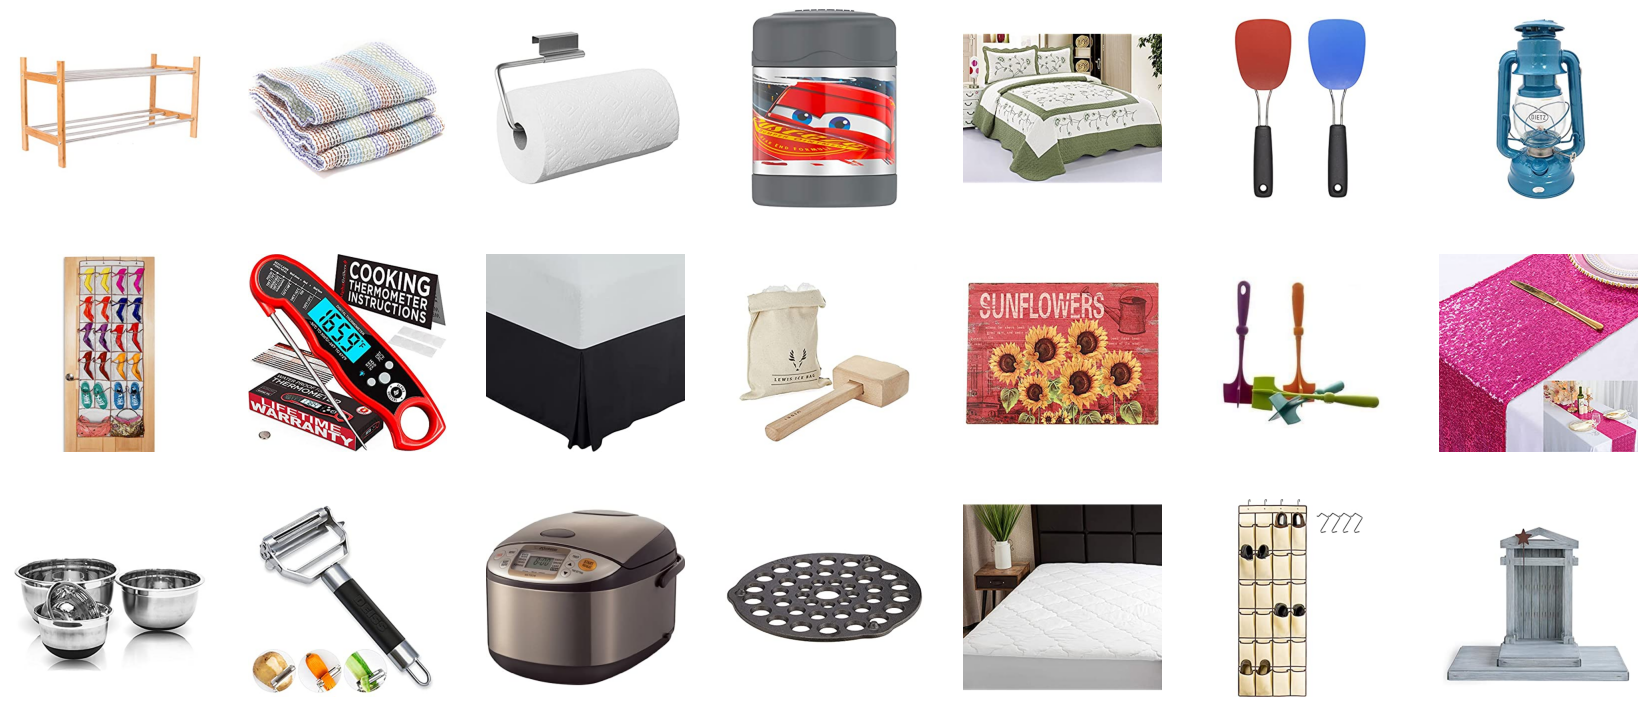

In [42]:
def plot_images(paths: List[Path], titles=None, imgs_per_row=7, figsize=3):
    data = [ mpimg.imread(path) for path in paths]

    if titles is None:
        titles = ['' for _ in range(len(data))]
    
    n_rows = math.ceil(len(data) / imgs_per_row) 
    n_cols = min(imgs_per_row, len(data))

    f, axes = plt.subplots(n_rows,
                           n_cols,
                           squeeze=False,
                           figsize=(figsize*n_cols,figsize*n_rows))

    
    # We don't want ugly axes labels here
    for i in np.ndindex(*axes.shape):
        axes[i].set_axis_off()
    
    for i in range(len(data)):
        row_num = i // imgs_per_row
        row_col = i % imgs_per_row
        axis: Axes = axes[row_num, row_col]
        axis.set_title(titles[i])
        axis.imshow(data[i])
    plt.show()

some_images = amazon_dataset.product_images_df(DATASET).sample(n=21)
plot_images([
    amazon_dataset.product_images_dir(DATASET) / f'{slug}.jpg'
    for slug in some_images['slug']
])

Simple command to debug which variables we have defined

In [34]:
fig = px.histogram(reviews, x="overall", title='Stars per review')
fig.show()

In [35]:
fig = px.bar(
    reviews.groupby('reviewerID')['reviewerID'].count().value_counts(),
    log_y=True,
    title='Users vs Number of Reviews'
)
fig.show()